The dataset is designed to analyze hate speech and classify it into relevant categories. It consists of the following four columns:

1. **Text**:  
   This column contains the speech or content in textual form. It serves as the primary input for hate speech detection and categorization.

2. **Category**:  
   This column identifies the specific type of hate speech when present. The possible categories include:
   - **Body Shaming**: Speech targeting an individual's physical appearance.
   - **Racism**: Speech expressing prejudice or discrimination based on race.
   - **Threat**: Speech containing direct or implied threats of harm.
   - **Religious Hate**: Speech promoting hostility towards a religion or religious beliefs.
   - **Gender Bias**: Speech exhibiting discriminatory attitudes based on gender.
   - **No Category**: This applies to text classified as Non-Hate Speech.

3. **Label**:  
   This column is binary, where:
   - `1` indicates the text is classified as hate speech.
   - `0` indicates the text is not classified as hate speech.

4. **Sub-Category**:  
   This column provides finer granularity for hate speech under the Gender Bias category. It specifies:
   - **Bias Against Females**: Speech displaying prejudice towards women.
   - **Bias Against Males**: Speech displaying prejudice towards men.
   - **No Sub-Category**: For texts that either belong to Non-Hate Speech or do not fall under the Gender Bias category.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/all_hate_speech.csv")  # Replace with your file name

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

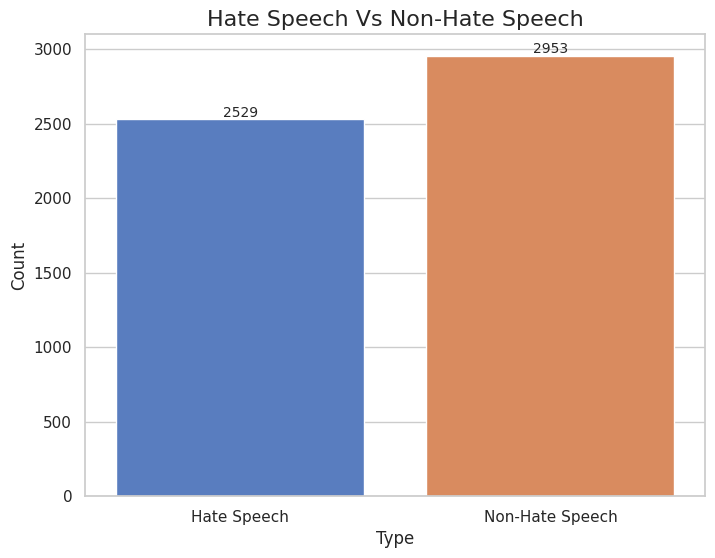

In [29]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Specify the order of bars and choose a different palette
ax = sns.countplot(x="label", data=df, palette="muted", order=[1, 0])

# Rename labels
ax.set_xticklabels(["Hate Speech", "Non-Hate Speech"])
ax.set_title("Hate Speech Vs Non-Hate Speech", fontsize=16)
ax.set_xlabel("Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Annotate bars with counts as integers
for p in ax.patches:
    count = int(p.get_height())  # Properly assign the count as an integer
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()


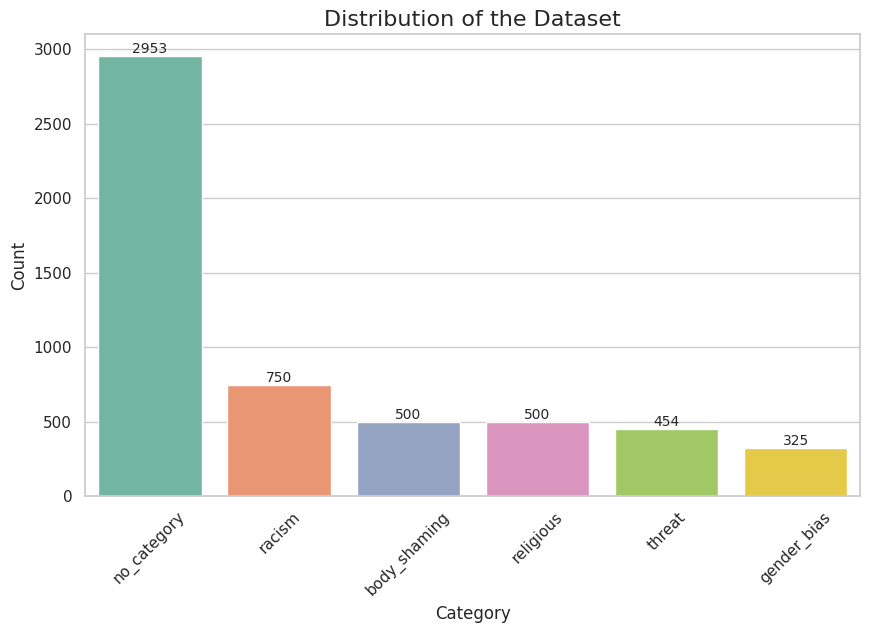

In [44]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the countplot with reordered categories and a palette
ax = sns.countplot(
    x="category",
    data=df,
    palette="Set2",
    order=df['category'].value_counts().index
)

# Set labels and title
ax.set_title("Distribution of the Dataset", fontsize=16)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# Annotate bars with integer counts
for p in ax.patches:
    count = int(p.get_height())  # Ensure count is an integer
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()

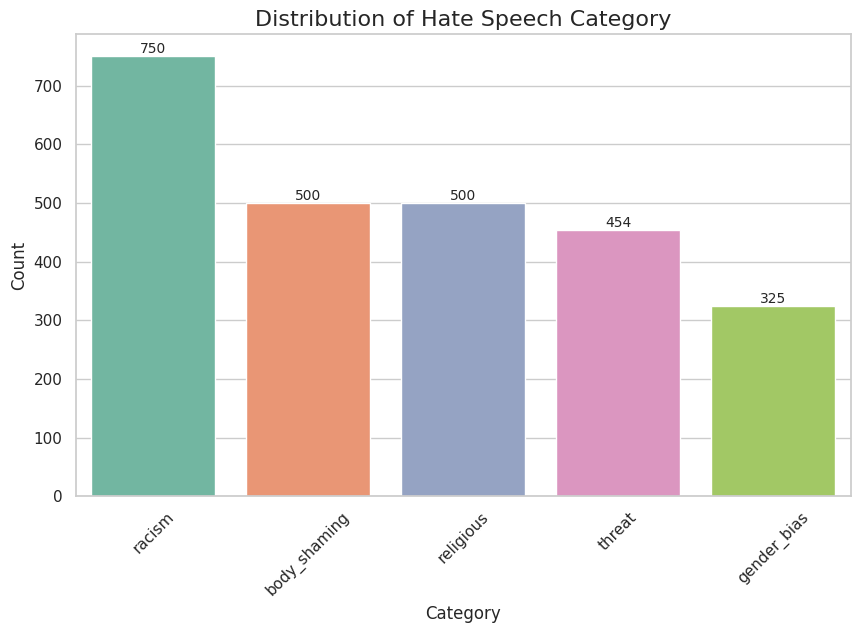

In [45]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Filter out the "no_categoried" rows
filtered_df = df[df['category'] != 'no_category']

# Create the countplot with reordered categories and a palette
ax = sns.countplot(
    x="category",
    data=filtered_df,
    palette="Set2",
    order=filtered_df['category'].value_counts().index
)

# Set labels and title
ax.set_title("Distribution of Hate Speech Category", fontsize=16)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

# Annotate bars with integer counts
for p in ax.patches:
    count = int(p.get_height())  # Ensure count is an integer
    ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.show()


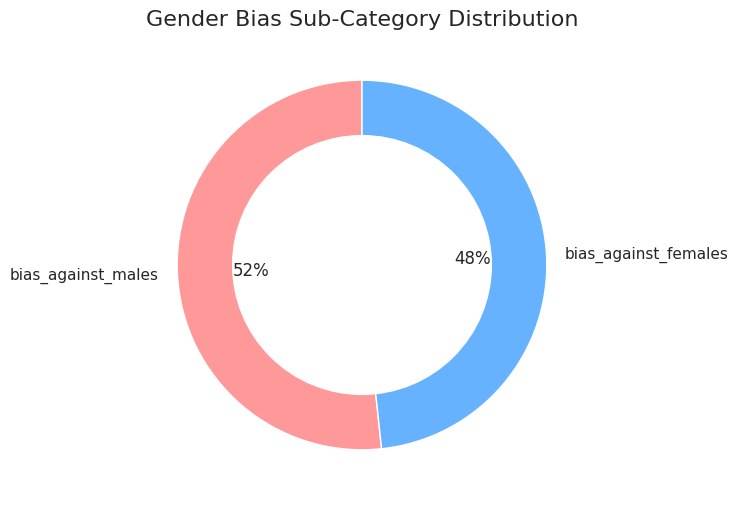

In [41]:
import matplotlib.pyplot as plt

# Filter data for relevant subcategories
filtered_data = df[df["sub_category"].isin(["bias_against_females", "bias_against_males"])]

# Count the occurrences of each subcategory
sub_category_counts = filtered_data["sub_category"].value_counts()

# Create labels and sizes for the chart
labels = sub_category_counts.index
sizes = sub_category_counts.values

# Plot a donut chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=["#FF9999", "#66B2FF"])
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

# Add title
plt.title("Gender Bias Sub-Category Distribution", fontsize=16)

# Show plot
plt.show()

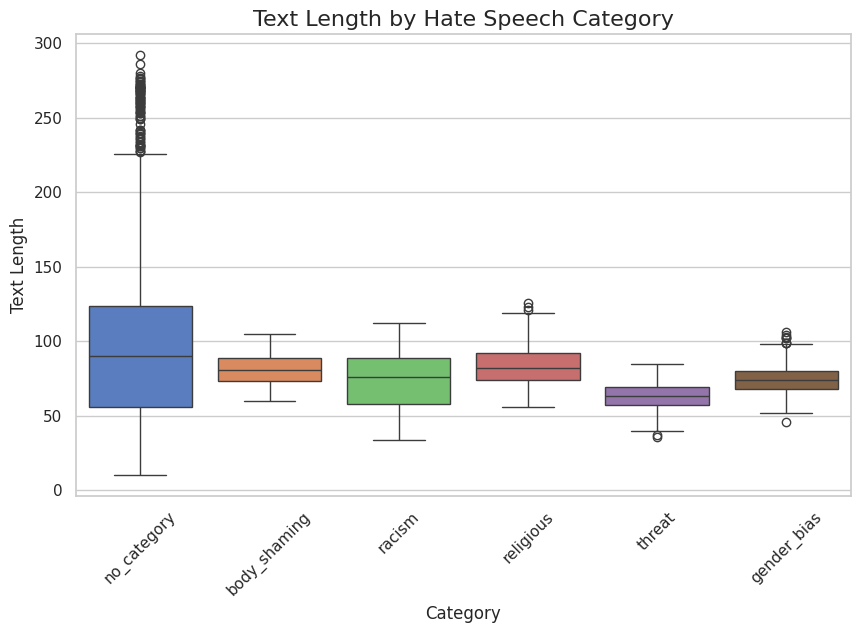

In [35]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Add a text length column
df['text_length'] = df['text'].apply(len)

# Create the boxplot
ax = sns.boxplot(x="category", y="text_length", data=df, palette="muted")
ax.set_title("Text Length by Hate Speech Category", fontsize=16)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Text Length", fontsize=12)
plt.xticks(rotation=45)

plt.show()

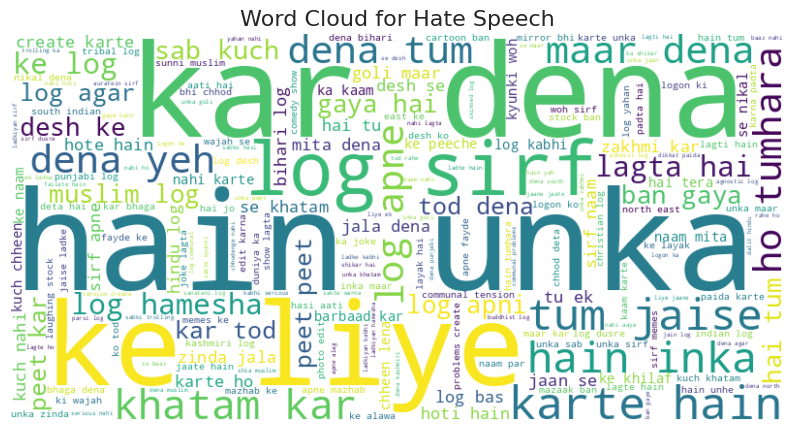

In [37]:
from wordcloud import WordCloud

# Generate a single string of all text for hate speech only
hate_speech_text = " ".join(df[df['label'] == 1]['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hate_speech_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Hate Speech", fontsize=16)
plt.show()
#word count of frquent used words